## Doing Time Tests with Multiprocessing

### Serial Time Test

Current Starting Position
[0. 0. 0. 0. 0. 0.]
Input values were (metallicity,age):
[1. 1. 0. 0. 0. 1.]
Optimizing Guess ***********


/apps/jupyterhub/1.1.0/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/apps/jupyterhub/1.1.0/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/apps/jupyterhub/1.1.0/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[3.01407694e-05 1.12004399e-05 1.06089058e-08 4.67871567e-05
 2.82394350e-05 1.19370178e-06]


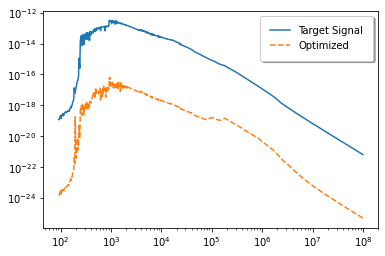

Starting emcee ***********
Start Burntime Calculations ***********
Done Burning Steps! Now starting the Final Calculations:
*****************
[##############################]
Derived values are (weight array): 
 [ 4.00861593 13.21316775  0.31844522  2.34193598  7.64153152  3.69894162]


<ipython-input-2-d6c22a77e65f>:221: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  samples=sampler.chain[:, np.rint(no_of_steps/5).astype(np.int):, :].reshape((-1, ndim))#sampler.flatchain


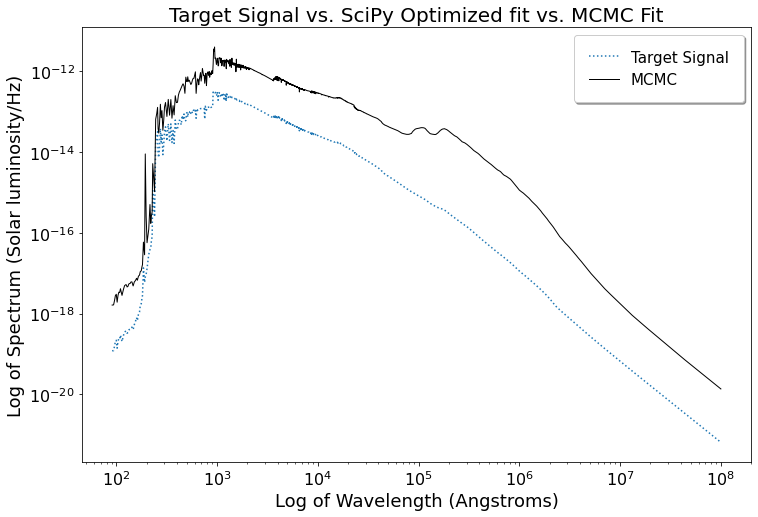

In [18]:
lb   = np.zeros(6)
ub   = np.full(6, 1e9)

start_time = time.time()

starting_weight_array = np.zeros(6)

print("Current Starting Position")
print(starting_weight_array)
print("Input values were (metallicity,age):")
print(test_weight_array)

print('Optimizing Guess ***********')

popt = log_galactic_optimize_guess(galactic_model_guess, starting_weight_array, lb, ub, wave, snorm, enorm)
print(popt)

spec_opt_guess= galactic_model_guess(popt, wave)

plt.loglog(wave, snorm, label='Target Signal')
plt.loglog(wave,spec_opt_guess, ls='--', label='Optimized')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 10})
plt.show()

perturbation= popt * 0.01
no_of_Chain=100
no_of_steps=1000

text_label=[]

for i in range(6):
    text_label.append('mass'+ str(i))
    
lb   = np.full(6, 0)
ub   = np.full(6, 1e9)

length_of_lb = len(lb)
ndim, nwalkers = length_of_lb, no_of_Chain## Do the first MCMC operation.

guesses = [popt + perturbation * np.random.randn(ndim) for i in range(nwalkers)]

print("Starting emcee ***********")
burntime = np.round(no_of_steps * .2)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_lnprob, threads=1, args=(lb, ub, galactic_model_guess, wave, snorm, enorm))
print("Start Burntime Calculations ***********")

pos, prob, state = sampler.run_mcmc(guesses, burntime)  #First Burning some steps
sampler.reset()

print("Done Burning Steps! Now starting the Final Calculations:")
print("*****************")
for i, result in enumerate(sampler.sample(pos, iterations=no_of_steps)):
    n = int((width+1) * float(i) / no_of_steps)
    sys.stdout.write("\r[{0}{1}]".format('#' * n, ' ' * (width - n)))
sys.stdout.write("\n")

best_fit2, exp_weight_array2 = galactic_print_and_plot_results(sampler, wave, snorm)

end_time = time.time()
serial_time = end_time - start_time

### Multi Time Test

Current Starting Position
[0. 0. 0. 0. 0. 0.]
Input values were (metallicity,age):
[1. 1. 0. 0. 0. 1.]
Optimizing Guess ***********


/apps/jupyterhub/1.1.0/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/apps/jupyterhub/1.1.0/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/apps/jupyterhub/1.1.0/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[3.01407694e-05 1.12004399e-05 1.06089058e-08 4.67871567e-05
 2.82394350e-05 1.19370178e-06]


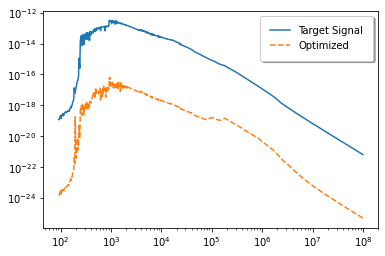

Starting emcee ***********
Start Burntime Calculations ***********
Done Burning Steps! Now starting the Final Calculations:
*****************
[##############################]
Derived values are (weight array): 
 [ 3.42245393 14.28556687  0.57164796  2.40105354  7.80757712 48.13651986]


<ipython-input-2-d6c22a77e65f>:221: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  samples=sampler.chain[:, np.rint(no_of_steps/5).astype(np.int):, :].reshape((-1, ndim))#sampler.flatchain


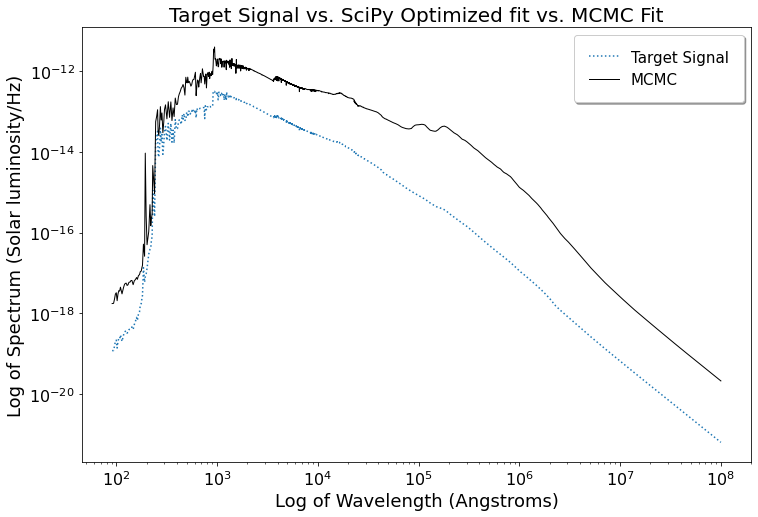

In [19]:
with Pool() as pool:
    lb   = np.zeros(6)
    ub   = np.full(6, 1e9)

    start_time = time.time()

    starting_weight_array = np.zeros(6)

    print("Current Starting Position")
    print(starting_weight_array)
    print("Input values were (metallicity,age):")
    print(test_weight_array)

    print('Optimizing Guess ***********')

    popt = log_galactic_optimize_guess(galactic_model_guess, starting_weight_array, lb, ub, wave, snorm, enorm)
    print(popt)

    spec_opt_guess= galactic_model_guess(popt, wave)

    plt.loglog(wave, snorm, label='Target Signal')
    plt.loglog(wave,spec_opt_guess, ls='--', label='Optimized')
    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 10})
    plt.show()

    perturbation= popt * 0.01
    no_of_Chain=100
    no_of_steps=1000

    text_label=[]

    for i in range(6):
        text_label.append('mass'+ str(i))

    lb   = np.full(6, 0)
    ub   = np.full(6, 1e9)

    length_of_lb = len(lb)
    ndim, nwalkers = length_of_lb, no_of_Chain## Do the first MCMC operation.

    guesses = [popt + perturbation * np.random.randn(ndim) for i in range(nwalkers)]

    print("Starting emcee ***********")
    burntime = np.round(no_of_steps * .2)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_lnprob, pool = pool, args=(lb, ub, galactic_model_guess, wave, snorm, enorm))
    print("Start Burntime Calculations ***********")

    pos, prob, state = sampler.run_mcmc(guesses, burntime)  #First Burning some steps
    sampler.reset()

    print("Done Burning Steps! Now starting the Final Calculations:")
    print("*****************")
    for i, result in enumerate(sampler.sample(pos, iterations=no_of_steps)):
        n = int((width+1) * float(i) / no_of_steps)
        sys.stdout.write("\r[{0}{1}]".format('#' * n, ' ' * (width - n)))
    sys.stdout.write("\n")

    best_fit2, exp_weight_array2 = galactic_print_and_plot_results(sampler, wave, snorm)

    end_time = time.time()
    multi_time = end_time - start_time

In [21]:
print("Multi is faster than serial by a factor of {:.2f}.".format(serial_time/multi_time))

Multi is faster than serial by a factor of 4.41.
Multi 2 is faster than serial by a factor of 4.04.
